In [2]:
'''
import tarfile  
import os  
  
# Define the path to the .tar.gz file  
tar_path = '../data/NFBS_Dataset.tar.gz'  
# Define the extraction directory  
extraction_path = '../data'  
  
# Create the extraction directory if it doesn't exist  
if not os.path.exists(extraction_path):  
    os.makedirs(extraction_path)  
  
# Open the tar file  
with tarfile.open(tar_path, 'r:gz') as tar:  
    # Extract all contents to the specified directory  
    tar.extractall(path=extraction_path)  
  
print(f"Extraction complete. Files are extracted to: {extraction_path}")  
'''

Extraction complete. Files are extracted to: ../data


In [3]:
'''
import shutil  
  
# Define the source and destination directories  
source_dir = '../data/NFBS_Dataset/'  
destination_dir = '../data/NFBS_Dataset_Flat/'  
  
# Create the destination directory if it doesn't exist  
if not os.path.exists(destination_dir):  
    os.makedirs(destination_dir)  
  
# Walk through the source directory  
for root, dirs, files in os.walk(source_dir):  
    for file in files:  
        # Construct full file path  
        file_path = os.path.join(root, file)  
        # Move file to the destination directory  
        shutil.move(file_path, os.path.join(destination_dir, file))  
  
print(f"Flattening complete. All files are in: {destination_dir}")  
'''

Flattening complete. All files are in: ../data/NFBS_Dataset_Flat/


In [4]:
'''
import gzip  
   
# Define the directory containing the .gz files  
directory = '../data/NFBS_Dataset_Flat/'  
  
# Iterate over all files in the directory  
for filename in os.listdir(directory):  
    if filename.endswith('.gz'):  
        # Construct the full file path  
        file_path = os.path.join(directory, filename)  
        # Define the output file path (removing the .gz extension)  
        output_file_path = os.path.join(directory, filename[:-3])  
  
        # Open the .gz file and extract its contents  
        with gzip.open(file_path, 'rb') as f_in:  
            with open(output_file_path, 'wb') as f_out:  
                shutil.copyfileobj(f_in, f_out)  
  
        # Optionally, remove the original .gz file after extraction  
        os.remove(file_path)  
  
print(f"Extraction complete. All .gz files in {directory} have been extracted.")  
'''

Extraction complete. All .gz files in ../data/NFBS_Dataset_Flat/ have been extracted.


In [5]:
import os
import zipfile
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import re
  
# Initialize a list to store file details  
file_details = []  
processed_dir = '../data/NFBS_Dataset_Flat'  
  
# Define a regex pattern to extract key parts of the filename  
# Assuming filenames like sub-A00028185_ses-NFB3_T1w.nii, sub-A00028185_ses-NFB3_T1w_brain.nii, sub-A00028185_ses-NFB3_T1w_brainmask.nii  
pattern = re.compile(  
    r"sub-(?P<SubjectID>A\d+)_ses-(?P<SessionID>\w+)_T1w(_(?P<ScanDetail>.+))?\.nii"  
)  
  
# Loop through the directory and collect file details  
for root, dirs, files in os.walk(processed_dir):  
    for file_name in files:  
        if file_name.endswith('.nii'):  # Check if it's an .nii file  
            match = pattern.match(file_name)  
            if match:  
                subject_id = match.group('SubjectID')  
                session_id = match.group('SessionID')  
                scan_detail = match.group('ScanDetail') if match.group('ScanDetail') else 'T1w'  
  
                normalized_file_path = os.path.join(root, file_name).replace('\\', '/')  
  
                file_details.append({  
                    'Subject ID': subject_id,  
                    'Session ID': session_id,  
                    'Scan Detail': scan_detail,  
                    'File Path': normalized_file_path  
                })  
            else:  
                print(f"File does not match expected structure: {file_name}")  
  
# Convert the list to a DataFrame  
summary_df = pd.DataFrame(file_details)  
  
# Save or display the summary  
summary_file = '../data/NFBS_detailed_summary.csv'  
summary_df.to_csv(summary_file, index=False)  
print(f"Detailed summary created: {summary_file}")  

Detailed summary created: ../data/NFBS_detailed_summary.csv


In [9]:
# Filter the DataFrame to get rows where Scan Detail is 'brain'  
filtered_df = summary_df[summary_df['Scan Detail'] == 'brain']  
  
# Delete files where Scan Detail is not 'brain'  
for index, row in summary_df.iterrows():  
    if row['Scan Detail'] != 'brain':  
        os.remove(row['File Path'])  
  
# If there are any 'brain' files, get the first one  
if not filtered_df.empty:  
    first_nii_file = filtered_df['File Path'].iloc[0]  
    print(f"First .nii file with Scan Detail 'brain': {first_nii_file}")  
else:  
    print("No .nii file with Scan Detail 'brain' found.")  
  
# Save or display the summary of remaining files  
summary_file = '../data/NFBS_detailed_summary.csv'  
filtered_df.to_csv(summary_file, index=False)  
print(f"Detailed summary created: {summary_file}") 

First .nii file with Scan Detail 'brain': ../data/NFBS_Dataset_Flat/sub-A00028185_ses-NFB3_T1w_brain.nii
Detailed summary created: ../data/NFBS_detailed_summary.csv


In [11]:
filtered_df.head

<bound method NDFrame.head of     Subject ID Session ID Scan Detail  \
1    A00028185       NFB3       brain   
4    A00028352       NFB3       brain   
7    A00032875       NFB3       brain   
10   A00033747       NFB3       brain   
13   A00034854       NFB3       brain   
..         ...        ...         ...   
361  A00063103       NFB3       brain   
364  A00063326       NFB3       brain   
367  A00063368       NFB3       brain   
370  A00063589       NFB3       brain   
373  A00064081       NFB3       brain   

                                             File Path  
1    ../data/NFBS_Dataset_Flat/sub-A00028185_ses-NF...  
4    ../data/NFBS_Dataset_Flat/sub-A00028352_ses-NF...  
7    ../data/NFBS_Dataset_Flat/sub-A00032875_ses-NF...  
10   ../data/NFBS_Dataset_Flat/sub-A00033747_ses-NF...  
13   ../data/NFBS_Dataset_Flat/sub-A00034854_ses-NF...  
..                                                 ...  
361  ../data/NFBS_Dataset_Flat/sub-A00063103_ses-NF...  
364  ../data/NFBS_Dat

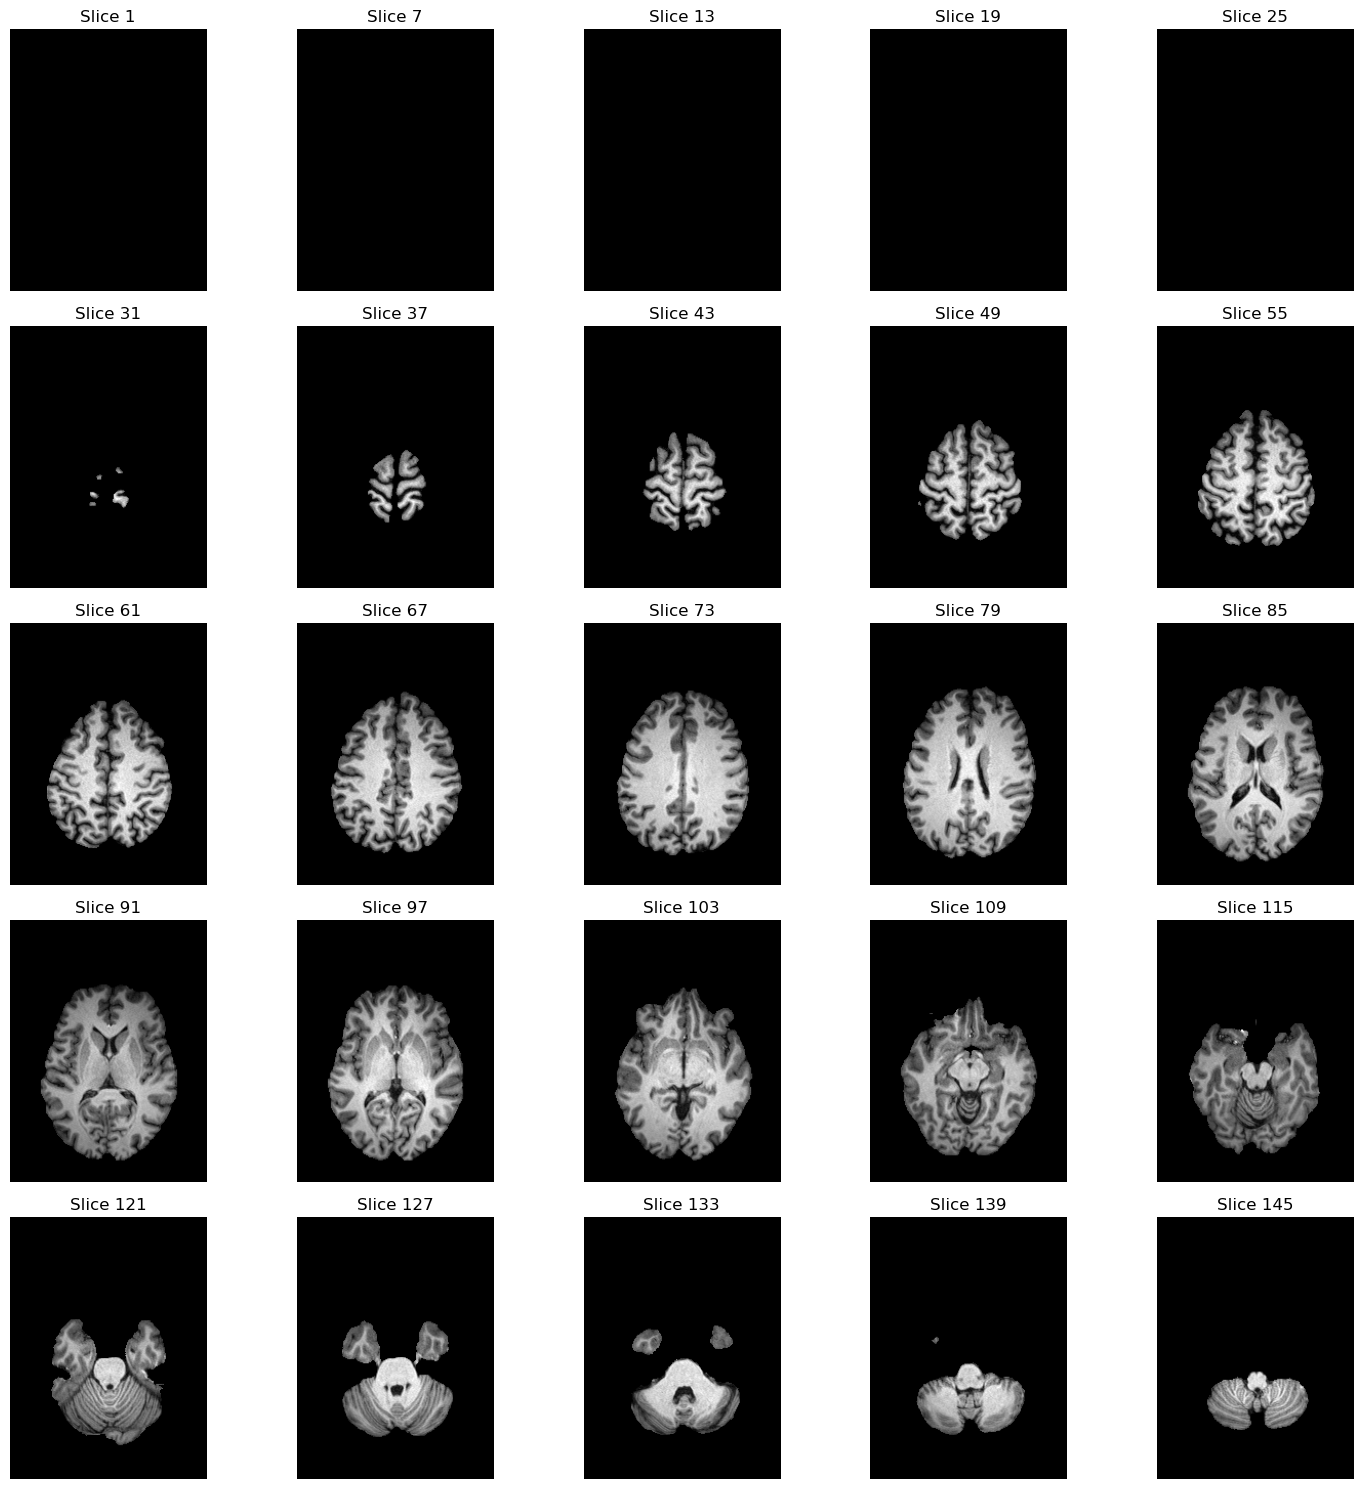

In [12]:
# Filter the first .nii file path from the 'File Path' column
first_nii_file = filtered_df['File Path'].iloc[0]

# Load the .nii file
nii_data = nib.load(first_nii_file)

# Extract the image data as a numpy array
image_data = nii_data.get_fdata()

# Calculate slice indices with an interval of 5, up to 25 slices
z_slices = [i for i in range(1, 26 * 6, 6) if i < image_data.shape[2]]


# Set up a 5x5 grid for displaying the slices
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    slice_index = z_slices[i]
    # Extract the slice along the z-axis
    slice_data = image_data[:, slice_index, :]
    rotated_slice = np.rot90(slice_data, k=-1)
    ax.imshow(rotated_slice.T, cmap='gray', origin='lower')
    ax.set_title(f'Slice {slice_index}')
    ax.axis('off')

plt.tight_layout()
plt.show()

